In [1]:
from netCDF4 import Dataset
import numpy as np
from fvcom.grid import FvcomGrid, uniform_triangular
from fvcom.depth import DepthCoordinate

In [2]:
rng = np.random.default_rng()
grid = uniform_triangular(5, depth=lambda m: rng.uniform(5, 15, m))

In [3]:
grid

FvcomGrid(ncoord=array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         0.5       ,  1.5       ,  2.5       ,  3.5       ,  1.        ,
         2.        ,  3.        ,  1.5       ,  2.5       ,  2.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.8660254 ,  0.8660254 ,  0.8660254 ,  0.8660254 ,  1.73205081,
         1.73205081,  1.73205081,  2.59807621,  2.59807621,  3.46410162],
       [ 5.8127667 , 13.15041661, 11.3103837 , 14.13839221,  8.73114996,
        13.02058098, 13.0939658 , 10.15745874, 11.44450836, 10.32177111,
         5.80181468, 12.79100326, 11.97541808, 11.35935062,  9.32561579]]), nv=array([[ 1,  2,  3,  4,  6,  7,  8,  6,  7,  8, 10, 11, 10, 11, 13, 13],
       [ 2,  3,  4,  5,  2,  3,  4,  7,  8,  9,  7,  8, 11, 12, 11, 14],
       [ 6,  7,  8,  9,  7,  8,  9, 10, 11, 12, 11, 12, 13, 14, 14, 15]]), calc=True)

In [4]:
dcoord = DepthCoordinate.from_asym_sigma(5, grid)
dcoord

DepthCoordinate(z=array([-0.  , -0.25, -0.5 , -0.75, -1.  ]), grid=FvcomGrid(ncoord=array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         0.5       ,  1.5       ,  2.5       ,  3.5       ,  1.        ,
         2.        ,  3.        ,  1.5       ,  2.5       ,  2.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.8660254 ,  0.8660254 ,  0.8660254 ,  0.8660254 ,  1.73205081,
         1.73205081,  1.73205081,  2.59807621,  2.59807621,  3.46410162],
       [ 5.8127667 , 13.15041661, 11.3103837 , 14.13839221,  8.73114996,
        13.02058098, 13.0939658 , 10.15745874, 11.44450836, 10.32177111,
         5.80181468, 12.79100326, 11.97541808, 11.35935062,  9.32561579]]), nv=array([[ 1,  2,  3,  4,  6,  7,  8,  6,  7,  8, 10, 11, 10, 11, 13, 13],
       [ 2,  3,  4,  5,  2,  3,  4,  7,  8,  9,  7,  8, 11, 12, 11, 14],
       [ 6,  7,  8,  9,  7,  8,  9, 10, 11, 12, 11, 12, 13, 14, 14, 15]]), calc=True))

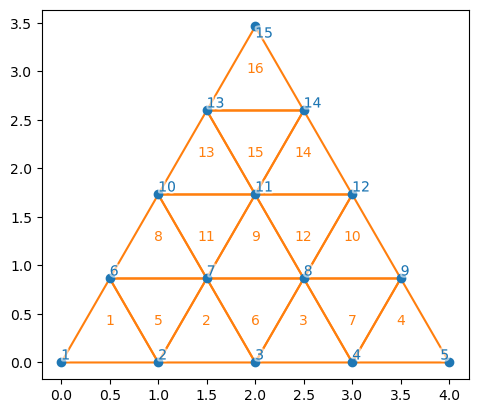

In [5]:
grid.plot();

In [6]:
ds2 = Dataset('testgrid.nc', 'w')
grid.to_nc(ds2)
dcoord.to_nc(ds2)
ds2

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): node(15), nele(16), three(3), siglay(4), siglev(5)
    variables(dimensions): float32 h(node), float32 x(node), float32 y(node), int32 nv(three, nele), float32 siglay(siglay), float32 siglev(siglev)
    groups: 

In [7]:
timeDim = ds2.createDimension('time', 20)
timeVar = ds2.createVariable('time', 'f4', (timeDim,))
timeVar[:] = np.arange(20) * 3000

zetaVar = ds2.createVariable('zeta', 'f4', ('time','node'))
zetaVar.long_name = 'Water Surface Elevation'
zetaVar.units = 'meters'
zetaVar.positive = 'up'
zetaVar.standard_name = 'sea_surface_elevation'
zetaVar.type = 'data'
rng = np.random.default_rng()
zetaVar[:] = rng.standard_normal(20 * grid.m, np.float32).reshape(20,grid.m)

dataVar = ds2.createVariable('data_node', 'f4', ('time','siglay','node'))
dataVar.long_name = 'Fake Node Data'
dataVar.units = 'none'
dataVar.type = 'data'
dataVar[:] = rng.random(20 * (dcoord.kb - 1) * grid.m, np.float32).reshape(20, dcoord.kb - 1, grid.m)

In [8]:
data2Var = ds2.createVariable('data_ele', 'f4', ('time','siglay','nele'))
data2Var.long_name = 'Fake Element Data'
data2Var.units = 'none'
data2Var.type = 'data'
data2Var[:] = rng.standard_normal(20 * (dcoord.kb - 1) * grid.n, np.float32).reshape(20, dcoord.kb - 1, grid.n)

In [9]:
ds2.close()